In [1]:
import os #for file handling
import cv2 #for image processing
import tensorflow as tf #for dl
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting graphs
from emnist import extract_training_samples, extract_test_samples

In [2]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')

In [3]:
first_image = x_train[0]
print(first_image.shape)

(28, 28)


In [4]:
x_train = x_train / 255.0  # Scale pixel values to [0, 1]
x_test = x_test / 255.0

In [5]:
# Preprocess the labels to convert them to integers
y_train = y_train - 1  # EMNIST labels start from 1, subtract 1 to make them start from 0
y_test = y_test - 1

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(360, activation="relu"))
model.add(tf.keras.layers.Dense(52, activation="softmax"))

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [8]:
# fitting the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
3900/3900 [==============================] - 36s 9ms/step - loss: 0.5366 - accuracy: 0.8314
Epoch 2/10
3900/3900 [==============================] - 31s 8ms/step - loss: 0.3085 - accuracy: 0.8978
Epoch 3/10
3900/3900 [==============================] - 37s 9ms/step - loss: 0.2561 - accuracy: 0.9133
Epoch 4/10
3900/3900 [==============================] - 33s 8ms/step - loss: 0.2252 - accuracy: 0.9227
Epoch 5/10
3900/3900 [==============================] - 37s 10ms/step - loss: 0.2015 - accuracy: 0.9286
Epoch 6/10
3900/3900 [==============================] - 28s 7ms/step - loss: 0.1854 - accuracy: 0.9345
Epoch 7/10
3900/3900 [==============================] - 36s 9ms/step - loss: 0.1711 - accuracy: 0.9384
Epoch 8/10
3900/3900 [==============================] - 27s 7ms/step - loss: 0.1638 - accuracy: 0.9409
Epoch 9/10
2709/3900 [===================>..........] - ETA: 9s - loss: 0.1502 - accuracy: 0.9452

KeyboardInterrupt: 

In [ ]:
model.save('alphabets.model')

INFO:tensorflow:Assets written to: alphabets.model\assets


INFO:tensorflow:Assets written to: alphabets.model\assets


In [ ]:
# evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(loss*100)
print(accuracy*100)

650/650 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.9115
36.08854115009308
91.14903807640076


1/1 [==============================] - 0s 49ms/step
The letter is probably a  V


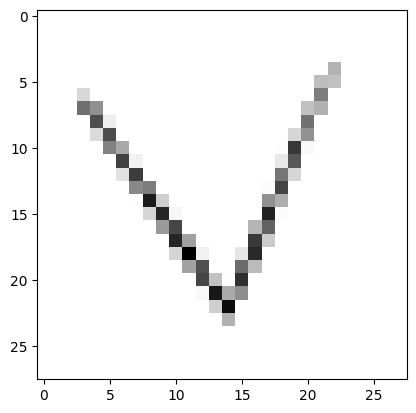

In [16]:
# load and use the model
model = tf.keras.models.load_model('alphabets.model')

# loading the image
img = cv2.imread(f"alphabets/capV.png")[:, :, 0]
# inverting the image
img = np.invert(np.array([img]))
# make prediction
prediction = model.predict(img)
# determine the label
predicted_label = np.argmax(prediction)
recognized_character = chr(predicted_label + ord('A'))
print("The letter is probably a ", recognized_character)
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()